In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [92]:
mesin=pd.read_csv('prediksi_kegagalan_mesin.csv')

In [93]:
mesin.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


Setiap baris dalam dataset mewakili satu unit mesin, dan kolom-kolomnya adalah atribut-atribut yang diamati pada mesin-mesin tersebut. Berikut adalah penjelasan dari setiap variabelnya:

footfall: Jumlah orang atau benda yang melewati mesin.

tempMode: Mode atau pengaturan suhu mesin.

AQ: Indeks kualitas udara di dekat mesin.

USS: Data sensor ultrasonik, yang menunjukkan pengukuran jarak.

CS: Pembacaan sensor arus, yang menunjukkan penggunaan arus listrik mesin.

VOC: Tingkat senyawa organik volatil yang terdeteksi di dekat mesin.

RP: Posisi rotasi atau RPM (putaran per menit) dari komponen mesin.

IP: Tekanan masukan ke mesin. Temperature:

Suhu pengoperasian mesin.

fail: Indikator biner kegagalan mesin (1 untuk kegagalan, 0 untuk tidak ada kegagalan).

Dataset ini memberikan informasi penting tentang karakteristik operasional mesin dan dapat digunakan untuk memprediksi atau menganalisis faktor-faktor risiko yang terkait dengan potensi kegagalan mesin.


In [94]:
mesin.tail(15)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
929,0,0,3,3,4,2,39,3,24,0
930,7300,7,3,3,5,1,40,7,24,1
931,75,4,5,2,7,5,62,6,24,1
932,0,7,5,2,6,4,46,6,24,1
933,27,7,4,4,7,2,46,3,24,0
934,1600,7,4,2,5,6,56,7,24,1
935,0,7,6,3,6,6,55,7,24,1
936,0,7,6,2,6,6,41,4,24,1
937,7300,1,2,3,6,0,43,7,24,0
938,16,7,7,1,7,6,34,3,24,1



Dataset ini memiliki total pengamatan 943

In [95]:
count_values = mesin['fail'].value_counts()
count_values

,count
fail,
0,551
1,393


In [96]:
# Menghitung rata-rata berdasarkan nilai 'fail'
mean_by_fail = mesin.groupby('fail').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'fail'
print(mean_by_fail)

        footfall  tempMode        AQ       USS        CS       VOC         RP  \
fail                                                                            
0     373.150635  3.760436  3.617060  3.484574  5.373866  1.312160  46.299456   
1     212.768448  3.681934  5.318066  2.175573  5.422392  4.987277  48.086514   

            IP  Temperature  
fail                         
0     4.450091    15.372051  
1     4.727735    17.676845  


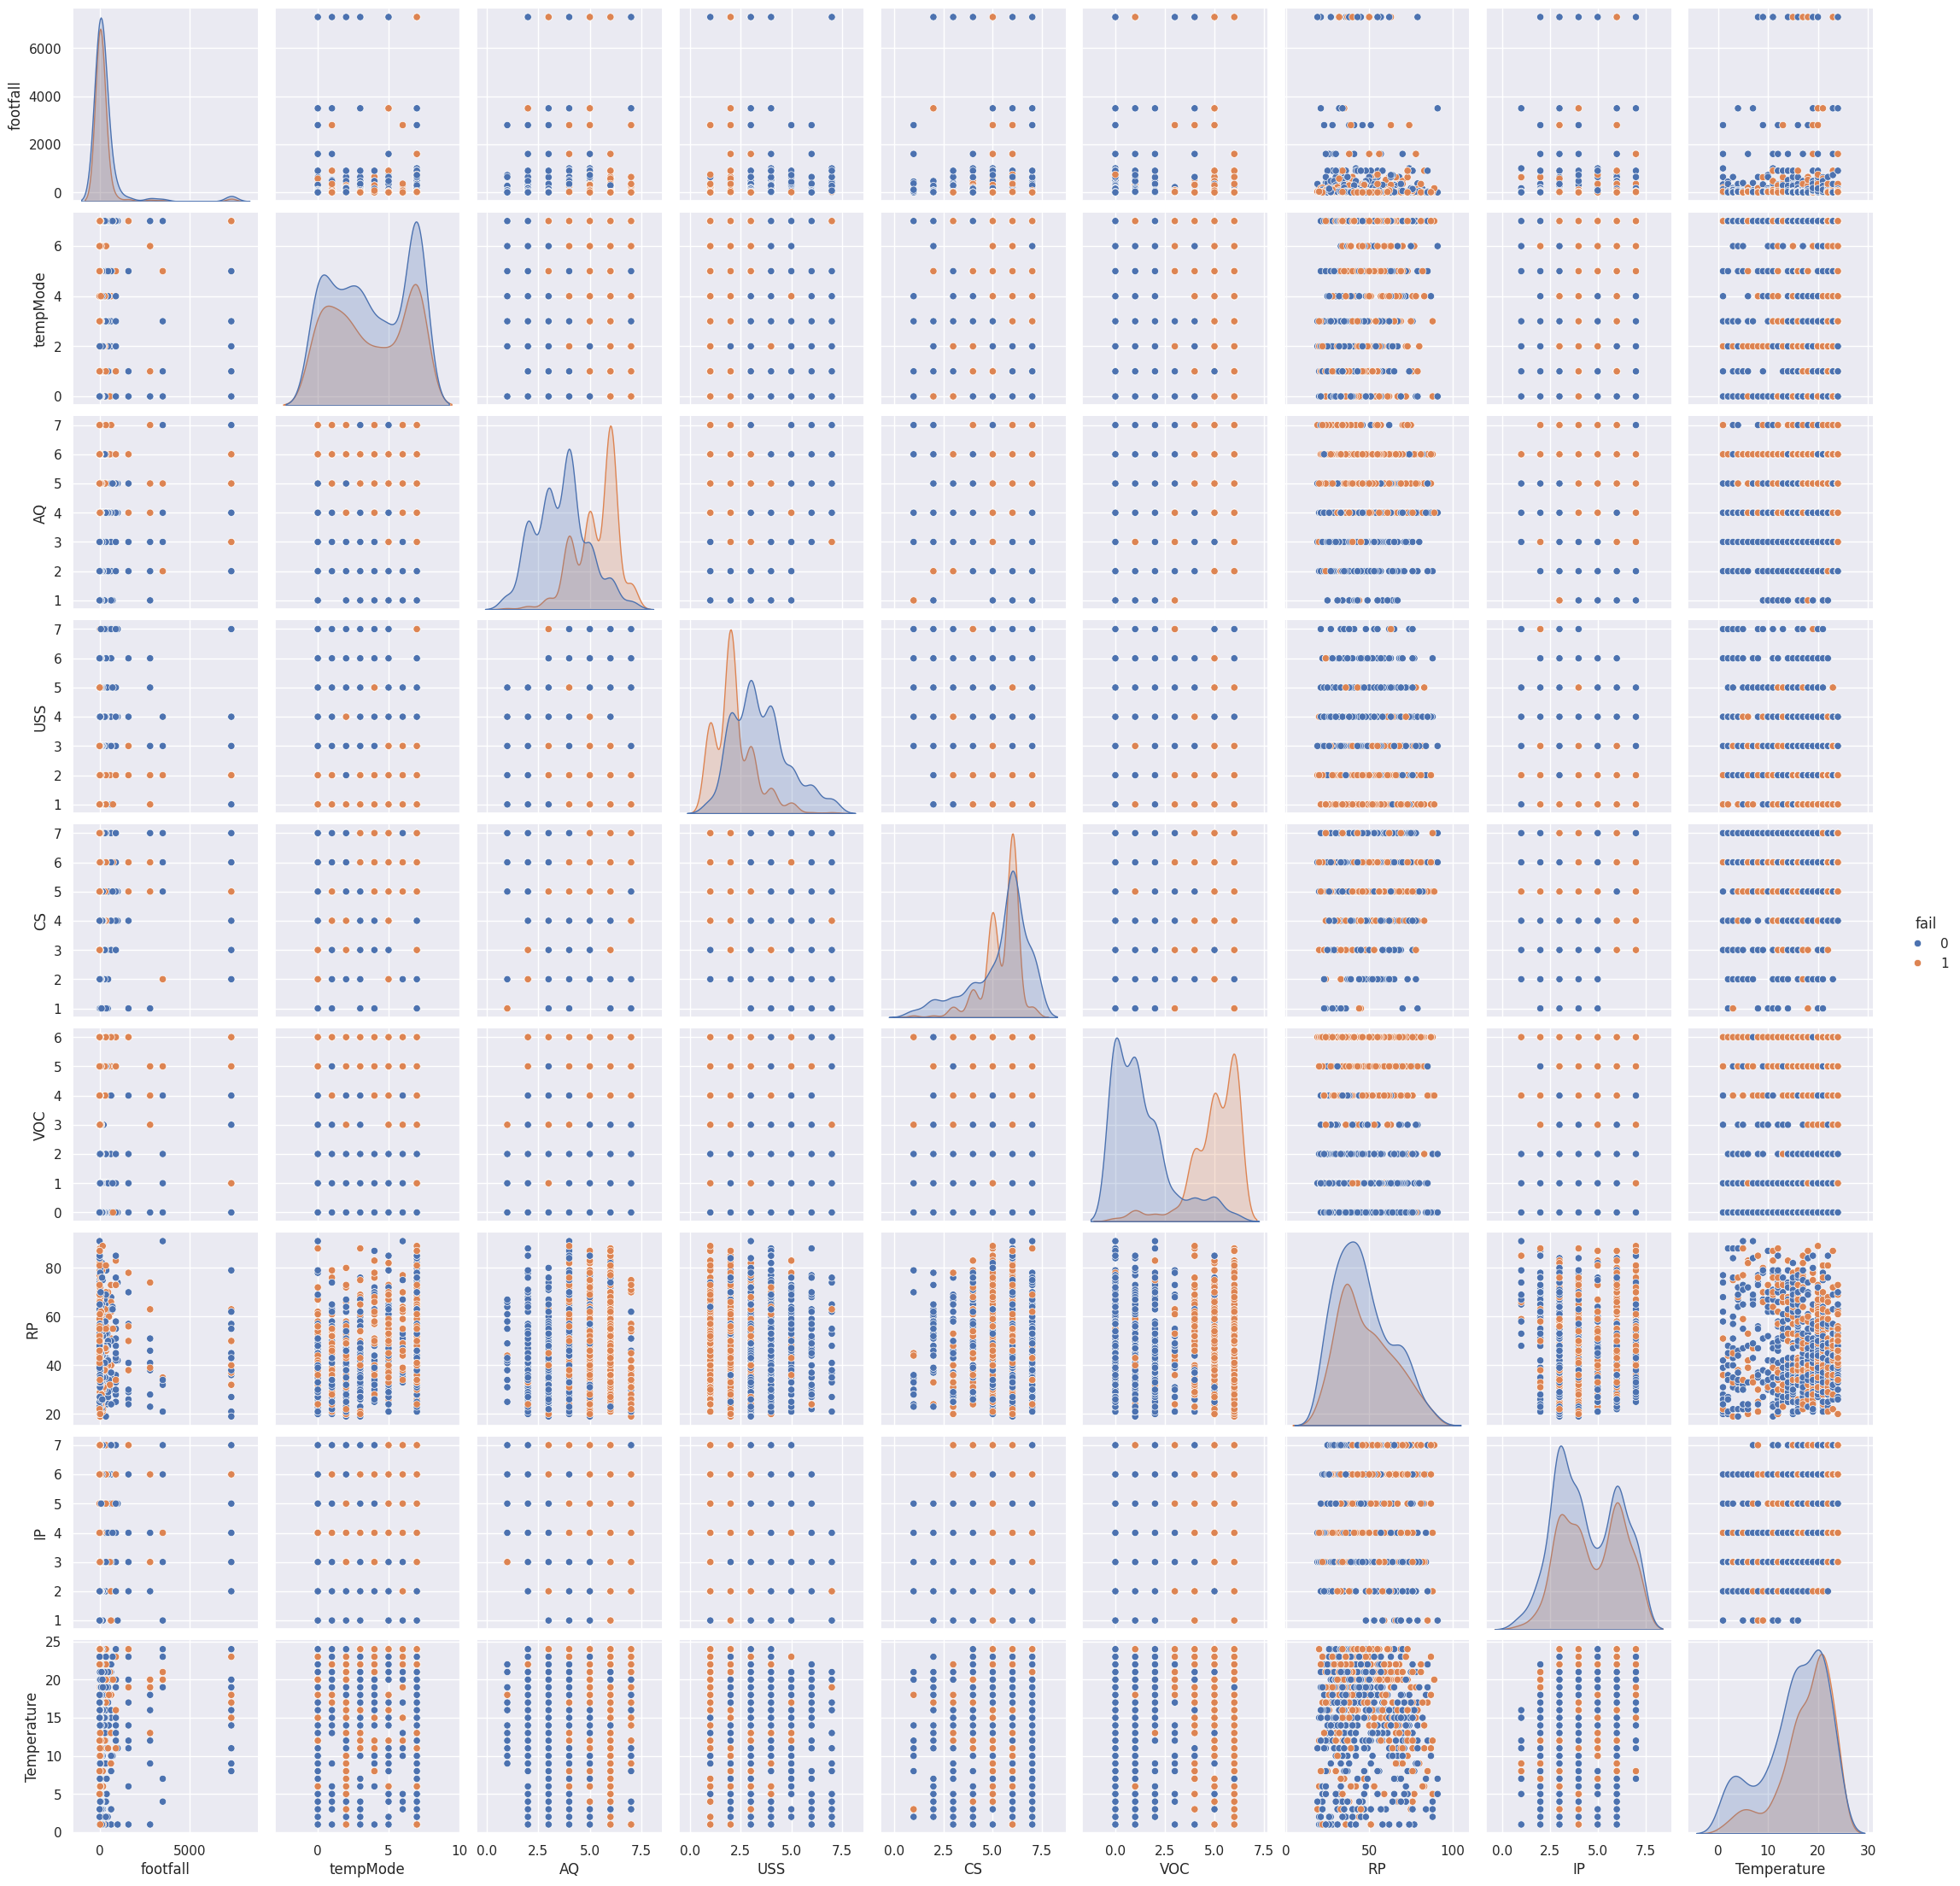

In [97]:
#visualisasi. warna dibedakan berdasarkan failnya apakah fail atau no fail
sns.pairplot(mesin, vars=['footfall',	'tempMode',	'AQ',	'USS',	'CS',	'VOC',	'RP',	'IP',	'Temperature'], hue='fail')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset mesin. Di sini, variabel-variabel yang dipilih untuk dianalisis adalah 'footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP','IP','Temperature', dan 'fail'.

1. sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel.
2. mesin: Merupakan dataset yang digunakan untuk membuat pairplot.
3. vars: Digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairplot.
4. hue='fail': Variabel 'fail' akan digunakan untuk membedakan data. Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'fail', yaitu apakah mesin gagal  atau tidak. Dengan menggunakan pairplot dan membagi warna berdasarkan 'fail', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah mesin gagal atau tidak. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan keberadaan diabetes pada dataset.

In [98]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'fail'
correlation_with_fail = mesin.corr()['fail'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'fail'
print(correlation_with_fail)

fail           1.000000
VOC            0.797329
AQ             0.583238
Temperature    0.190257
IP             0.085624
RP             0.053668
CS             0.018855
tempMode      -0.014462
footfall      -0.073066
USS           -0.466574
Name: fail, dtype: float64


output ini adalah nilai korelasi antara variabel 'fail' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1.

1. Korelasi Positif: Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Misalnya, VOC memiliki korelasi sebesar 0.797329 dengan 'fail'. Ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara VOC dan kemungkinan mesin itu mengalami kegagalan  (fail=1). Semakin tinggi VOC, semakin tinggi kemungkinan mesin mengalami kegagalan.

2. Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya, USS memiliki korelasi sebesar -0.466574 dengan 'fail'. Ini menunjukkan bahwa ada hubungan negatif yang cukup kuat antara USS dan kemungkinan mesin itu tidak mengalami kegagalan  (fail=-1). Semakin rendah USS, semakin tinggi kemungkinan mesin tidak mengalami kegagalan

3. Korelasi Dekat dengan 0: Nilai korelasi mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi yang signifikan antara variabel tersebut dengan 'fail'. Dalam kasus ini, variabel 'CS','RP', dan 'IP' memiliki nilai korelasi yang cukup rendah dengan 'fail' (kurang dari 0.1), yang menunjukkan hubungan yang lemah dengan atau tidak terlalu berpengaruh mesin itu mengalami kegagalan.

Ringkasnya, nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'fail' (gagal atau tidak gagal). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan kemungkinan terjadinya  mesinmengalami kegagalan pada dataset.

# MEMISAHKAN VARIABEL X DAN Y

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen (fail) dalam dataset.

1. Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

2. Data y (fail/Labels): Merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.

Pemisahan ini penting karena:

1. Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

2. Validasi dan Evaluasi: Data y (fail) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [99]:
#memisahkan data menjadi variabel x dan y
X=mesin.drop(['fail'], axis=1)
y=mesin['fail']

# MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING

Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.

besarnya pembagian data:

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar) y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil) test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing. random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.

Hasil dari fungsi train_test_split adalah empat keluaran:

1. X_train: Data training untuk fitur-fitur.
2. X_test: Data testing untuk fitur-fitur.
3. y_train: Data training untuk target atau label.
4. y_test: Data testing untuk target atau label.

Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [101]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[7.26027397e-03 1.00000000e+00 1.66666667e-01 ... 5.27777778e-01
  8.33333333e-01 4.78260870e-01]
 [3.01369863e-03 0.00000000e+00 6.66666667e-01 ... 5.83333333e-01
  5.00000000e-01 6.08695652e-01]
 [7.53424658e-03 1.42857143e-01 1.66666667e-01 ... 3.05555556e-01
  3.33333333e-01 8.69565217e-01]
 ...
 [5.89041096e-02 7.14285714e-01 5.00000000e-01 ... 4.72222222e-01
  3.33333333e-01 8.26086957e-01]
 [5.47945205e-04 1.00000000e+00 1.66666667e-01 ... 3.75000000e-01
  5.00000000e-01 7.82608696e-01]
 [1.91780822e-03 1.00000000e+00 3.33333333e-01 ... 5.97222222e-01
  8.33333333e-01 8.69565217e-01]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

# NAIVE BAYES

In [102]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [103]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [104]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.9072847682119205

In [105]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [106]:
# import accuracy_score function
from sklearn.metrics import accuracy_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9048


# Proses Membuat Model dengan Neural Network

In [107]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=1 menunjukkan bahwa validasi silang dilakukan dengan 1 lipatan (1-fold cross-validation).

Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid

In [109]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 100}


In [110]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.001,max_iter=100)

clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

1. hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

2. max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [111]:
y_pred = clf.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96  9]
 [11 73]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       105
           1       0.89      0.87      0.88        84

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (prediksi_kegagalan_mesin) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

1. **Precision**: 0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 90% di antaranya adalah benar-benar kelas negatif. 1 (Kelas Positif): Sekitar 90% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

2. **Recall**: 0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 92% dari mereka. 1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model hanya dapat mengenali sekitar 87% dari mereka.

3. **F1-Score**: F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 91%, sedangkan untuk kelas 1 adalah 88%. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

4. **Accuracy**: Akurasi model adalah sekitar 89%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.

5. **Interpretasi**: Meskipun akurasi secara keseluruhan adalah 90%, melihat pada recall untuk kelas 1 (0.87) menunjukkan bahwa model memiliki performa yang lebih tinggi dalam mengidentifikasi kasus positif (1). Terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi kasus negatif (0) tetapi kurang baik dalam memprediksi kasus positif (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model.

In [113]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.894

Output 0.894 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.894 berarti bahwa model berhasil memprediksi dengan benar sekitar 89,4% dari semua sampel pada data uji (y_test) yang telah digunakan.

# KNN (K-Nearest Neighbor)

In [114]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('prediksi_kegagalan_mesin.csv')
print("5 Data Teratas:")
print(df.head())

#  Pisahkan fitur dan label (ubah sesuai kolom pada dataset )
# Ganti 'status' dengan nama kolom target klasifikasi yang sesuai pada dataset.
# Misalnya, jika kolom target adalah 'fail', maka ubah kode menjadi:
X = df.drop('fail', axis=1)  # fitur
y = df['fail']               # label

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ubah nilai k
knn.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred = knn.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

5 Data Teratas:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0

Confusion Matrix:
[[87 15]
 [12 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       102
           1       0.83      0.86      0.85        87

    accuracy                           0.86       189
   macro avg       0.86      0.86      0.86       189
weighted avg       0.86      0.86      0.86       189



 K-Nearest Neighbor (KNN) adalah salah satu algoritma dalam pembelajaran mesin yang digunakan untuk melakukan klasifikasi maupun regresi. K-Nearest Neighbor (KNN) digunakan untuk memprediksi kemungkinan terjadinya kegagalan pada mesin berdasarkan atribut-atribut seperti footfall, tempMode, AQ, USS, CS, VOC, RP, IP, Temperature, dan fail. Setiap baris dalam dataset merepresentasikan satu pengamatan kondisi mesin pada suatu waktu tertentu, dan kolom-kolomnya adalah atribut-atribut yang diukur.

 **Kelebihan KNN**
 1. Sederhana dan Mudah dipahami
 2. Tidak Membutuhkan Proses Pelatihan yang Kompleks
 3. Dapat Menangani Data Non-Linear
 4. Adaptif terhadap Data Baru

 **Kekurangan KNN**
 1. Lambat pada Dataset Besar
 2. Sensitif terhadap Skala Fitur
 3. Dipengaruhi oleh Noise dan Outlier
 4. Sulit Menentukan Nilai k yang Optimal

**Langkah-langkah klasifikasi:**
1. Import Library yang Diperlukan
2. Membaca Dataset
3. Menentukan Fitur dan Label
4. Membagi Data Menjadi Data Latih dan Uji
5. Normalisasi Data (Standardisasi)
6. Inisialisasi dan Pelatihan Model KNN
7. Melakukan Prediksi dan Evaluasi Model

Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (prediksi_kegagalan_mesin) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

**Precision**: 0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 88% di antaranya adalah benar-benar kelas negatif. 1 (Kelas Positif): Sekitar 83% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

**Recall**: 0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 85% dari mereka. 1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model hanya dapat mengenali sekitar 86% dari mereka.

**F1-Score**: F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 87%, sedangkan untuk kelas 1 adalah 85%. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

**Accuracy**: Akurasi model adalah sekitar 86%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.

**Interpretasi**: Meskipun akurasi secara keseluruhan adalah 86%, melihat pada recall untuk kelas 1 (0.86) menunjukkan bahwa model memiliki performa yang lebih tinggi dalam mengidentifikasi kasus positif (1). Terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi kasus negatif (0) tetapi kurang baik dalam memprediksi kasus positif (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model.

In [115]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.857

# Visualisasi Naive Bayes dan KNN

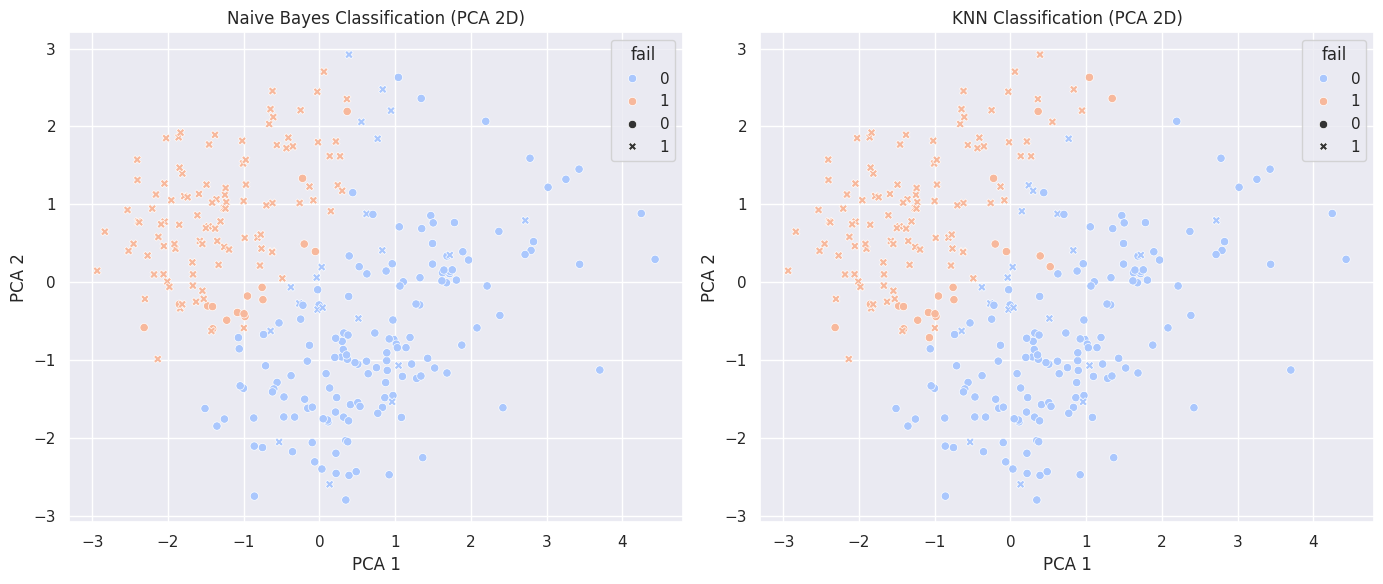

In [116]:
# Langkah 1: Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Langkah 2: Upload file
# from google.colab import files # This is commented out as it is not needed in a Jupyter notebook on Linux
# uploaded = files.upload()

# Langkah 3: Load dataset
df = pd.read_csv('prediksi_kegagalan_mesin.csv')
df.head()

# Langkah 4: Pra-pemrosesan
label_encoder = LabelEncoder()
# The 'fail' column was intended to be used here for encoding (from previous code)
df['fail'] = label_encoder.fit_transform(df['fail'])  # fail=1, no fail=0

# Using 'fail' as target variable y (consistent with previous code examples)
X = df.drop('fail', axis=1)
y = df['fail']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA untuk reduksi dimensi
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Langkah 5: Latih model
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
y_pred_nb = nb_model.predict(X_test_pca)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_test_pca)

# Langkah 6: Visualisasi
plt.figure(figsize=(14, 6))

# Visualisasi Naive Bayes
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_nb, palette='coolwarm', style=y_test)
plt.title('Naive Bayes Classification (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Visualisasi KNN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_knn, palette='coolwarm', style=y_test)
plt.title('KNN Classification (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

# Perbandingan Naive Bayes dan KNN

<ipython-input-118-f2ba91796b61>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set2')


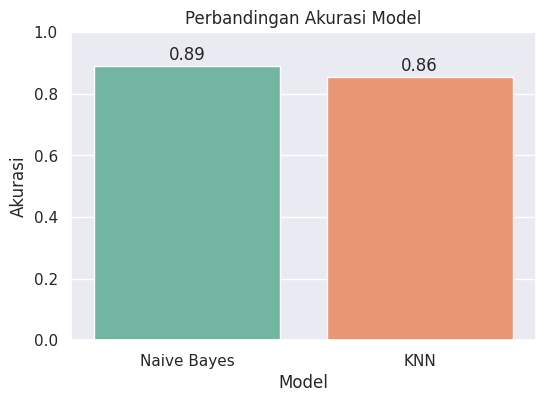

In [118]:

# Calculate accuracy for KNN
acc_knn = round(accuracy_score(y_test, y_pred_knn), 3)

# Assuming you have the Naive Bayes predictions (y_pred_nb) from previous code
# If not, you need to run the Naive Bayes model first to get y_pred_nb
# For example:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train_scaled, y_train) # Assuming scaled data is used for Naive Bayes too
# y_pred_nb = nb.predict(X_test_scaled)

# acc_nb = round(accuracy_score(y_test, y_pred_nb), 3) # Calculate accuracy for Naive Bayes

# Visualisasi akurasi kedua model
plt.figure(figsize=(6, 4))
model_names = ['Naive Bayes', 'KNN']
accuracies = [0.89, acc_knn] # Replace 0.850 with acc_nb once calculated

sns.barplot(x=model_names, y=accuracies, palette='Set2')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)  # akurasi maksimum 100%
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.grid(True, axis='y')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

**Perbandingan Hasil Akurasi**

1. Hasil akurasi Naive Bayes yaitu 0.90 atau 90%.
 Akurasi Naive Bayes (0.90): Model Naive Bayes memiliki akurasi yang lebih tinggi dibandingkan dengan KNN. Ini menunjukkan bahwa Naive Bayes lebih efektif dalam menangani data uji yang digunakan, mungkin karena asumsi distribusi data yang sesuai dengan distribusi Gaussian.

2. Hasil KNN yaitu 0.86 atau 86%.
Akurasi KNN (0.86): Meskipun KNN juga memberikan hasil yang cukup baik, akurasi ini sedikit lebih rendah dibandingkan dengan Naive Bayes. KNN bekerja berdasarkan kedekatan data dalam ruang fitur, dan mungkin ada beberapa faktor dalam data yang membuat KNN sedikit kurang efektif dalam memprediksi dibandingkan Naive Bayes